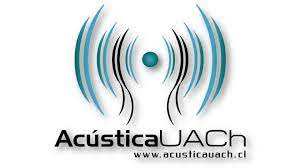
</div>

## Universidad Austral de Chile
## Facultad de ciencias de la ingeniería
## Instituto de acústica<h2><h2>
<h1 style="text-align:center"> <font size=6>Tarea 3: Análisis de Evento Sísmico</font><h1><h1>
<h2 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h2>
<h3 style="text-align:center">17 de junio de 2022</h3>
<h3 style="text-align:left">Integrantes:</h3>
<p style="text-align:left"> Juan José Ardiles<br>
<a href="mailto:juan(dot)ardiles(dot)r(at)gmail(dot)com">juan(dot)ardiles(dot)r(at)gmail(dot)com</a><br>
<p style="text-align:left"> Felipe Riquelme G.<br>
<a href="mailto:felipe(dot)riquelme01(at)alumnos(dot)uach(dot)cl">felipe(dot)riquelme01(at)alumnos(dot)uach(dot)cl</a><br>
<h3 style="text-align:left">Profesor:</h3>
<p style="text-align:left"> Víctor Poblete<br>
<a href="mailto:vpoblete(at)uach(dot)cl">vpoblete(at)uach(dot)cl</a><br>

In [2]:
from obspy import read
import pandas as pd

### Introducción

A continuación se realizará un proceso de análisis para un evento sísmico, en el cual se detallarán y describirán las características más importantes en este tipo de fenómenos. Para efectos de ejemplificación se utilizará un sismo ocurrido el día 23 de septiembre del año 2018, a las 05:32 hrs, con una magintud de 5.4° Richter, cuya ubicación será posteriormente identificada a través de los procedimientos de lectura de archivos SAC. Es importante mencionar también que se utilizará la librería Obspy para la obtención de todos estos datos.

## Lectura de Archivos y Metadatos

El primer paso para el desarrollo de la actividad será utilizar la función 'read' de la librería obspy, la cual permitirá leer los archivos de cada medición del evento sísmico y de esta manera entregar los datos en pantalla. Para ésto, se creará un objeto tipo "stream", el cual incluirá la información de la medición en cada estación, a través de los 3 archivos que describen el evento en cada eje, es decir, este-oeste, norte-sur, y el eje vertical o "z". Se repetirá este procedimiento para cada estación, con el objetivo de disponer toda la información en sólo 4 streams.

In [3]:
#Stream es un archivo que contiene variada información de un evento
#Incluímos las 3 mediciones, o trazas, en un único objeto stream para mayor comodidad al manipular los datos
#Primera estación CO02
st_co02=read('Evento Sismico\CO02\CO02_HHE.SAC') #Creamos un objeto stream con el primer archivo de mediciones
st_co02+=read('Evento Sismico\CO02\CO02_HHN.SAC') #Al mismo stream le añadimos el segundo archivo
st_co02+=read('Evento Sismico\CO02\CO02_HHZ.SAC') #Finalmente agregamos el último archivo al stream
#Repetimos el mismo procedimiento para la estación 2, GO01
st_go01=read('Evento Sismico\GO01\GO01_BHE.SAC')
st_go01+=read('Evento Sismico\GO01\GO01_BHN.SAC')
st_go01+=read('Evento Sismico\GO01\GO01_BHZ.SAC')
#Nuevamente el mismo procedimiento para la estación 3, GO03
st_go03=read('Evento Sismico\GO03\GO03_BHE.SAC')
st_go03+=read('Evento Sismico\GO03\GO03_BHN.SAC')
st_go03+=read('Evento Sismico\GO03\GO03_BHZ.SAC')
#Y Finalmente para la estación 4, PB09
st_pb09=read('Evento Sismico\PB09\PB09_HHE.SAC')
st_pb09+=read('Evento Sismico\PB09\PB09_HHN.SAC')
st_pb09+=read('Evento Sismico\PB09\PB09_HHZ.SAC')
#Ahora hacemos un print de estos streams
print(st_co02)
print(st_go01)
print(st_go03)
print(st_pb09)

3 Trace(s) in Stream:
C1.CO02..HHE | 2018-09-23T05:33:31.000000Z - 2018-09-23T05:41:51.000000Z | 100.0 Hz, 50001 samples
C1.CO02..HHN | 2018-09-23T05:33:31.000000Z - 2018-09-23T05:41:50.990000Z | 100.0 Hz, 50000 samples
C1.CO02..HHZ | 2018-09-23T05:33:31.000001Z - 2018-09-23T05:41:51.000001Z | 100.0 Hz, 50001 samples
3 Trace(s) in Stream:
C.GO01..BHE | 2018-09-23T05:33:11.000000Z - 2018-09-23T05:40:51.000000Z | 40.0 Hz, 18401 samples
C.GO01..BHN | 2018-09-23T05:33:11.000000Z - 2018-09-23T05:40:51.000000Z | 40.0 Hz, 18401 samples
C.GO01..BHZ | 2018-09-23T05:33:11.000000Z - 2018-09-23T05:40:51.000000Z | 40.0 Hz, 18401 samples
3 Trace(s) in Stream:
C.GO03..BHE | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
C.GO03..BHN | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
C.GO03..BHZ | 2018-09-23T05:32:51.000000Z - 2018-09-23T05:39:51.000000Z | 40.0 Hz, 16801 samples
3 Trace(s) in Stream:
CX.PB09..HHE | 2018-09-23T05:32:3

Como se puede apreciar en la celda anterior, cada objeto stream contiene 3 trazas, las cuales contienen la información de las mediciones para cada eje. Y al momento de hacer un 'print', cada traza muestra 3 datos principales: Primero se encuentra el nombre de la traza, posteriormente la fecha de inicio y término de la medición, y finalmente la frecuencia de muestreo junto a la cantidad total de muestras de la medición.

### Lectura de data

Otra opción que permite Obspy es la lectura directa de los datos de la medición a través de la función 'data'. Para ésto se debe seleccionar una traza de un respectivo stream, y posteriormente la librería nos entrega un arreglo numppy, cuyo contenido es cada una de las muestras de la medición correspondiente. A continuación se hará una muestra para la traza del eje z(posición 2 de cada stream) de cada medición.

In [4]:
print(st_co02[2].data)
print(st_go01[2].data)
print(st_go03[2].data)
print(st_pb09[2].data)

[168. 179. 182. ... 166. 167. 162.]
[974. 976. 978. ... 431. 430. 495.]
[ -92. -133. -179. ... -945. -984. -990.]
[6198. 6376. 6491. ... 7934. 7414. 6904.]


### Lectura de metadatos

Por otro lado Obspy también permite la lectura de los metadatos asociados a cada traza. Para poder acceder a ellos basta con utilizar la función stats, como se muestra a continuación.

In [5]:
st_co02[2].stats

         network: C1
         station: CO02
        location: 
         channel: HHZ
       starttime: 2018-09-23T05:33:31.000001Z
         endtime: 2018-09-23T05:41:51.000001Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 50001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -34052.0, 'depmax': 27581.0, 'scale': 1.0, 'b': 1e-06, 'e': 500.0, 'evla': -24.3503, 'evlo': -70.0323, 'evdp': 59.3, 'mag': 5.4, 'user0': 767.8136, 'user1': 0.0, 'dist': 765.4271, 'depmen': 282.8951, 'nzyear': 2018, 'nzjday': 266, 'nzhour': 5, 'nzmin': 33, 'nzsec': 31, 'nzmsec': 0, 'nvhdr': 6, 'npts': 50001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'CO02', 'kuser0': 'Mww', 'kcmpnm': 'HHZ', 'knetwk': 'C1'})

A continuación se procederá a analizar los metadatos más importantes para este tipo de mediciones, comparando los resultados entre las distintas estaciones de medición, en el caso de un mismo evento sísmico.

## Network o Red

El primer dato que se puede obtener en este tipo de archivos es la red a la cual pertenece la estación que realizó la medición. Para ésto, se utilizará la función 'stats' de la librería Obspy, la cual permite seleccionar los distintos metadatos que incluye el archivo de medición. Es importante recalcar que por convención, el archivo del eje z es el que incluye mayor cantidad de datos, por lo que éste será el utilizado para el proceso de lectura.

In [6]:
co01_red = [st_co02[2].stats.station,st_co02[2].stats.network]
go01_red = [st_go01[2].stats.station,st_go01[2].stats.network]
go03_red = [st_go03[2].stats.station,st_go03[2].stats.network]
pb09_red = [st_pb09[2].stats.station,st_pb09[2].stats.network]
redes = [co01_red,go01_red,go03_red,pb09_red]
tablared=pd.DataFrame(redes,columns=['Estación','Red'])
tablared

,Estación,Red
0,CO02,C1
1,GO01,C
2,GO03,C
3,PB09,CX


 En la tabla anterior se puede visualizar que las 4 estaciones que realizaron la medición para este evento sísmico pertenecen a 3 redes distintas. Según la base de datos de Wilber3 de IRIS, tenemos que los códigos de estas redes corresponden a los siguientes nombres:

|Red   ||Nombre                                                                 |
|------||-----------------------------------------------------------------------|
|C     ||Chilean National Seismic Network(20)                                   |
|C1    ||Red Sismológica Nacional(82)                                           |
|CX    ||IPOC Seismic Network (Integrated Plate Boundary Observatory Chile)(22) |    

## Estaciones de Medición

También a través de esta librería como ya se ha podido mostrar, podemos encontrar las estaciones en las cuales fueron hechas estas mediciones. A continuación se identificarán cada una de estas estaciones, para las cuales hasta el momento solo reconocemos por su código. Para esto se recurrirá a la información de la web Wilber 3 de Iris nuevamente.

|Estación  ||Nombre                           |Latitud|Longitud|Elevación|
|----------||---------------------------------|-------|--------|---------|
|C002      ||Combarbalá                       |-31.20°|-71.00° |1190m    |
|GO01      ||Chusmiza, Chile                  |-19.67°|-69.19° |3809m    |
|GO03      ||Copiapó (Tierra Amarilla), Chile |-27.59°|-70.23° |730m     |
|PB09      ||IPOC Station Quillagua Chile     |-21.80°|-69.24° |1530m    |

### Ubicaciones de las estaciones

Ahora que ya tenemos la información del nombre y la ubicación para cada estación, se mostrará a continuación una imagen referencial con su ubicación geográfica. La estación puede identificarse a través del símbolo de triángulo azul dispuesto en el mapa.

#### Combarbalá


<div>
<img src="CO02.jpg" width="500">
</div>


#### Chusmiza

<div>
<img src="GO01.jpg" width="500">
</div>

#### Copiapó

<div>
<img src="GO03.jpg" width="500">
</div>

#### Quillagua

<div>
<img src="PB09.jpg" width="500">
</div>

## Frecuencia de Sampleo

## Información Horaria y Temporal

En cuanto a este tipo de data, principalmente podemos 2 distinguir 2 datos importantes. La hora y fecha de inicio del evento, y la hora y fecha de término del mismo. Ambas informaciones se presentan en formato UTC (Universal Time Coordinated), el cual es el principal estándar de tiempo que regula los horarios a nivel mundial. A continuación se hará un print para cada una de las mediciones.

In [9]:
co01_t = [st_co02[2].stats.station,st_co02[2].stats.starttime,st_co02[2].stats.endtime]
go01_t = [st_go01[2].stats.station,st_go01[2].stats.starttime,st_go01[2].stats.endtime]
go03_t = [st_go03[2].stats.station,st_go03[2].stats.starttime,st_go03[2].stats.endtime]
pb09_t = [st_pb09[2].stats.station,st_pb09[2].stats.starttime,st_pb09[2].stats.endtime]
tiempos = [co01_t,go01_t,go03_t,pb09_t]
tablati=pd.DataFrame(tiempos,columns=['Estación','Hora de inicio','Horario de término'])
tablati

,Estación,Hora de inicio,Horario de término
0,CO02,2018-09-23T05:33:31.000001Z,2018-09-23T05:41:51.000001Z
1,GO01,2018-09-23T05:33:11.000000Z,2018-09-23T05:40:51.000000Z
2,GO03,2018-09-23T05:32:51.000000Z,2018-09-23T05:39:51.000000Z
3,PB09,2018-09-23T05:32:31.000000Z,2018-09-23T05:38:51.000000Z


# Datos importantes


* Frecuencia de sampleo Cantidad de muestras


* Magnitud del evento
* Ubicación del evento (latitud,longitud, profundidad) Distancia entre estacion y evento(dist)
* Profundidades mínimas y máximas




In [10]:
print(st_co02[2].stats.sac.evla) 
print(st_go01[2].stats.sac.evla) 
print(st_go03[2].stats.sac.evla) 
print(st_pb09[2].stats.sac.evla)

-24.3503
-24.3503
-24.3503
-24.3503


In [11]:
d = { 'CO02': [st_co02[2].stats.sac.evla, st_co02[2].stats.sac.evlo, st_co02[2].stats.sac.evdp, st_co02[2].stats.sac.dist, -173.1, st_co02[2].stats.sac.mag],
'GO01': [st_go01[2].stats.sac.evla, st_go01[2].stats.sac.evlo, st_go01[2].stats.sac.evdp, st_go01[2].stats.sac.dist, 9.58, st_go01[2].stats.sac.mag],
'GO03': [st_go03[2].stats.sac.evla, st_go03[2].stats.sac.evlo, st_go03[2].stats.sac.evdp, st_go03[2].stats.sac.dist,-176.83, st_go03[2].stats.sac.mag],
'PB09': [st_pb09[2].stats.sac.evla, st_pb09[2].stats.sac.evlo, st_pb09[2].stats.sac.evdp, st_pb09[2].stats.sac.dist, 16.05, st_pb09[2].stats.sac.mag]
}
print ("{:<9} {:<18} {:<20} {:<18} {:<20} {:<10} {:<10}".format('Estación','    Latitud [°]','   Longitud [°]','Profundidad [km]',' Distancia [km]', 'Azimuth [°]', 'Magnitud Mww'))
for Est, v in d.items():
 Lat, Lon, Pro, Dis, Azi, Mag = v
 print ("{:<9} {:<18} {:<20} {:<18} {:<20} {:<10} {:<10}".format(Est, Lat, Lon, Pro, Dis, Azi, Mag))

Estación      Latitud [°]       Longitud [°]      Profundidad [km]    Distancia [km]      Azimuth [°] Magnitud Mww
CO02      -24.350299835205078 -70.03230285644531   59.29999923706055  765.4271240234375    -173.1     5.400000095367432
GO01      -24.350299835205078 -70.03230285644531   59.29999923706055  525.5869140625       9.58       5.400000095367432
GO03      -24.350299835205078 -70.03230285644531   59.29999923706055  359.89990234375      -176.83    5.400000095367432
PB09      -24.350299835205078 -70.03230285644531   59.29999923706055  294.1982116699219    16.05      5.400000095367432


Como podemos apreciar en la tabla anterior, donde se muestran las coordenadas del evento sísmico entregadas por las estaciones correspondientes, todas estas estaciones nos entregan las mismas, además observamos el valor de Azimuth para cada estación, que es el ángulo del arco en grados formado desde el epicentro a la estación, siendo 0° el norte, 90° el este y -90° el oeste. Estos valores se obtienen al triangular la ubicación del evento, usando la diferencia de tiempo de arribo de las ondas P y S, la cuál se incrementa a medida que las estaciones se alejan de la fuente.

En la siguiente imagen, se aprecian las estaciones y sus distancias al epicentro, unidos con una recta con la cuál, al compararla con una recta trazada de norte a sur que pasa por el epicentro, se puede apreciar el azimuth expresado en la tabla anterior:

<img src="Estaciones.JPG">

Además, en el gráfico a continuación se puede apreciar la diferencia de llegada de las ondas P y S para cada estación, donde la demora es proporcional a la distancia de la estación al epicentro del evento sísmico, como se explica en el párrafo anterior.

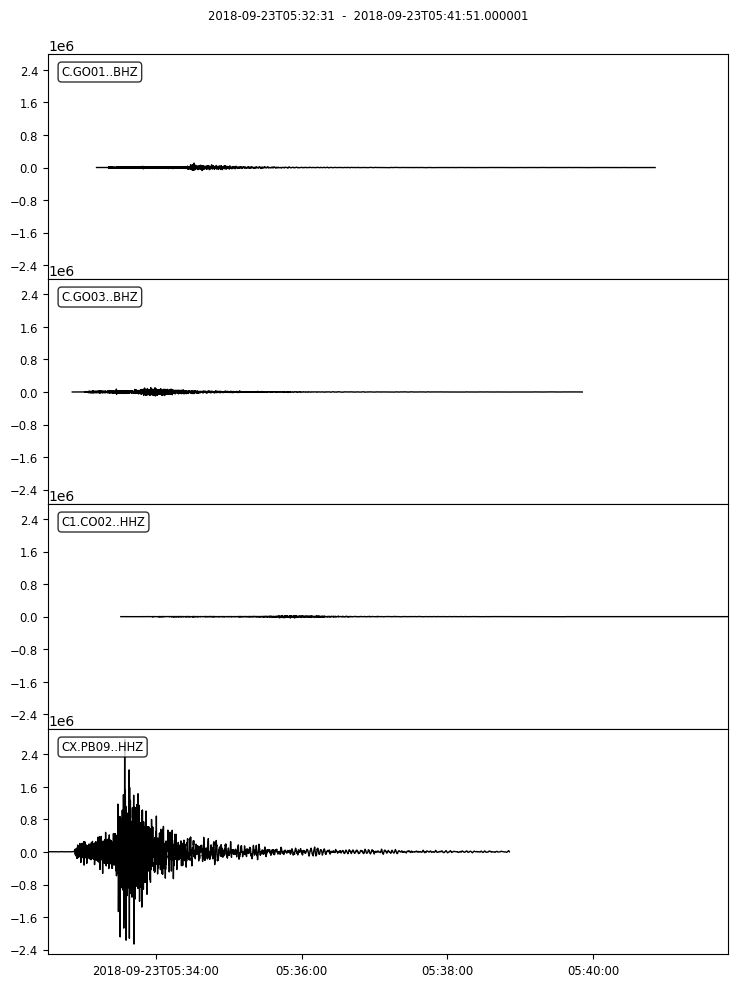

In [12]:
st_Z=read('Evento Sismico\CO02\CO02_HHZ.SAC')
st_Z+=read('Evento Sismico\GO01\GO01_BHZ.SAC')
st_Z+=read('Evento Sismico\GO03\GO03_BHZ.SAC')
st_Z+=read('Evento Sismico\PB09\PB09_HHZ.SAC')
st_Z.plot();

Por último, en la tabla podemos apreciar que la Magnitud exhibida por todas las estaciones es la misma, de 5.4 Mww. Esta escala logarítmica Mww se define como una escala de magnitud de momento, y su principal característica es que no existe una saturación cuando los valores son muy altos, es decir, que no importa que tan altos sean los valores de magnitud, estos son diferenciables unos de los otros, a diferencia de las escalas del mismo tipo llamadas ML, M8 y mb.$^{(1)}$

Además, por la profundidad del hipocentro del sismo (59,29 km) y su ubicación en la superficie (epicentro), se puede descartar que se trate de un sismo Outer-Rise, los que ocurren a profundidades menores a 30 km. y costa afuera de la fosa oceánica. También descartamos que se trate de un sismo por falla transformante, producidos por el desplazamiento lateral de una placa respecto de otra vecina, los que en Chile se dan en su mayoría en la zona extremo sur, entre las placas Scotia y Sudamericana$^{(2)}$.

Ciertamente estamos en presencia de un sismo Tectónico, que predominan en nuestro país, ya que no hay presencia de actividad volcánica en el sector del evento avistado para clasificarlo como Sismo Volcánico, ni tampoco como Sismo de Colapso, que se deben a derrumbamientos de cavernas o minas, los que son superficiales y de magnitud baja.$^{(3)}$

En cuanto a su profundidad, está en el límite para ser considerado supercial o cortical (de profundidad menor a los 60 km.), mientras que además podríamos clasificarlo de un sismo interplaca o de subducción, al estar en las proximidades de la zona de acoplamiento entre las placas de Nazca y la Sudamericana, y los cuales van entre los 40 y 60 km. de profundidad máxima, por lo que el sismo analizado estaría dentro del rango de esta clasificación, también casi al límite.$^{(1)}$

### Bibliografía

* (1) Hanks, Thomas C.; Kanamori, Hiroo (1979) 'A Moment Magnitud Scale' Journal of Geophysical Research 
* (2) 'Tipos de Sismos en Chile' CSN (Centro Sismológico Nacional) https://www.csn.uchile.cl/tipos-de-sismos-chile/
* (3) 'Tipos de Sismos' IGC-Universidad de Panamá https://web.archive.org/web/20190710205019/http://www.panamaigc-up.com/tipos-de-sismos/